In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import and Clean the Data

First, we'll repeat the steps that we did in the last notebook to prepare the dataset.

In [11]:
art = pd.read_csv('../data/public_art.csv')
art = art.drop(columns = ['Mapped Location'])
art = art.rename(columns = {
    'Title': 'title', 
    'Last Name': 'last_name', 
    'First Name': 'first_name',
    'Location': 'loc', 
    'Medium': 'medium',
    'Type': 'art_type',
    'Description': 'desc', 
    'Latitude': 'lat', 
    'Longitude': 'lng'})

art.head(2)

,title,last_name,first_name,loc,medium,art_type,desc,lat,lng
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774


### More exploration with pandas
 - .value_counts()
 - .reset_index()
 - .describe()
 - .info()
 - .isnull().sum()

Recall that `value_counts( )` tallies the number of each value for a column; here we look at the art_type column.

In [12]:
art['art_type'].value_counts()

Sculpture             61
Mural                 38
Monument              16
Frieze                 2
Mobile                 2
Mosaic                 2
Various                2
Furniture              1
Relief                 1
Stained Glass          1
Bronzes                1
Sculpture/Fountain     1
Street Art             1
mural                  1
Fountain               1
Multipart              1
Name: art_type, dtype: int64

Let's save it into a variable and check what type of object it is.

In [13]:
type_counts = art['art_type'].value_counts()
type_counts.head()

Sculpture    61
Mural        38
Monument     16
Frieze        2
Mobile        2
Name: art_type, dtype: int64

Let's check to see what `type_counts` is. Is it a DataFrame?

In [14]:
type(type_counts)

pandas.core.series.Series

If you look at the head, you'll notice that the art type is now the index value for the Series

In [15]:
type_counts.head(2)

Sculpture    61
Mural        38
Name: art_type, dtype: int64

In [16]:
type_counts.index

Index(['Sculpture', 'Mural', 'Monument', 'Frieze', 'Mobile', 'Mosaic',
       'Various', 'Furniture', 'Relief', 'Stained Glass', 'Bronzes',
       'Sculpture/Fountain', 'Street Art', 'mural', 'Fountain', 'Multipart'],
      dtype='object')

You can move the index value to a column (converting the series to a DataFrame in the process) with the `reset_index()` method.

In [17]:
#reset index resets to 0-based index and moves existing index to a column
type_counts = type_counts.reset_index()
type_counts

,index,art_type
0,Sculpture,61
1,Mural,38
2,Monument,16
3,Frieze,2
4,Mobile,2
5,Mosaic,2
6,Various,2
7,Furniture,1
8,Relief,1
9,Stained Glass,1


Now check the type again and look at the head

In [18]:
type(type_counts)

pandas.core.frame.DataFrame

In [19]:
type_counts.head(2)

,index,art_type
0,Sculpture,61
1,Mural,38


Now you can rename the columns to something more reasonable.

In [26]:
type_counts.columns = ['art_type', 'number']
type_counts.head(3)

,art_type,number
0,Sculpture,61
1,Mural,38
2,Monument,16


The `.info( )` method gets lots more information about the dataset: 
 - number of rows
 - types for each column
 - size in memory
 - missingness

In [21]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       132 non-null    object 
 1   last_name   132 non-null    object 
 2   first_name  122 non-null    object 
 3   loc         131 non-null    object 
 4   medium      128 non-null    object 
 5   art_type    132 non-null    object 
 6   desc        87 non-null     object 
 7   lat         132 non-null    float64
 8   lng         132 non-null    float64
dtypes: float64(2), object(7)
memory usage: 9.4+ KB


If you want to explore the missing values, the `.isna()` method can be useful. It returns a _Boolean_ (True/False) value indicating whether a particular value is missing (NA).

In [22]:
art['first_name'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
127     True
128    False
129    False
130    False
131    False
Name: first_name, Length: 132, dtype: bool

For example, we can use this in combination with `.loc` to find rows there the first name is missing.

In [23]:
art.loc[art['first_name'].isna()]

,title,last_name,first_name,loc,medium,art_type,desc,lat,lng
30,Eastside Mural,Sterling Goller-Brown. Ian Lawrence,NaN,1008 Forrest Ave,Spray Paint,Mural,NaN,36.178323,-86.750240
54,Johnny Cash Mural,"Bryan Deese, Audie Adams, Ryan Shrader",NaN,300 4th Avenue,Latex paint and spray paint,Mural,Classic street art by Thoughts Manifested crew...,36.158301,-86.774955
63,Maybelle Carter,Brian Law / Jenna Colt,NaN,625 8th Ave S.,acrylic,Mural,NaN,36.150892,-86.779582
69,"Our Past, Your Future",Sterling Goller-Brown. Ian Lawrence,NaN,1524 Gallatin Ave,Spray Paint,Mural,NaN,36.194354,-86.743985
82,Rose on 65th Street,Will Ryman,NaN,919 Broadway,Fiberglass resin and stainless steel,Sculpture,Colossal roses painted in bright colors with g...,36.157631,-86.783767
103,Tennessee WWII Memorial,Tuck-Hinton,NaN,"600 James Robertson Pkwy, Nashville TN",Granite globe floating on 1/8 inch of water,Monument,Memorial commemorates Tennessee soldiers servi...,36.172020,-86.788640
116,Tomatoes,"Sterling Goller-Brown and Ian Lawrence, co-cre...",NaN,701 Porter Rd at Eastland Ave,paint on brick,Mural,Tomatoes,36.182437,-86.733449
118,Two Musicians,Sterling Goller-Brown. Ian Lawrence,NaN,1008 Forrest Ave,Spray Paint,Mural,NaN,36.178323,-86.750240
125,Warner Monument,White & Son,NaN,"1101 Lebanon Pike, Nashville TN",Sculpture: marble; sub base: marble; Bottom ba...,Monument,NaN,36.148830,-86.732390
127,We Are Our Stories,Omari Booker & The REAL Program at Oasis Center,NaN,1037 28th Avenue North,acrylic & spray paint on plywood,Mural,"""We Are Our Stories"" is a public art project t...",36.165101,-86.822209


You can also check the number of null values by chaining the `isna( )` and `sum( )` methods together.

The reason this works is that Python will treat True as 1 and False as 0 when doing arithmetic on Booleans.

In [24]:
art.isna().sum()

title          0
last_name      0
first_name    10
loc            1
medium         4
art_type       0
desc          45
lat            0
lng            0
dtype: int64

For quantitative (numeric) variables, the `.describe( )` method gives statistical information:
- count
- mean
- standard deviation
- minimum
- maximum
- quartiles


In [27]:
type_counts['number'].describe()

count    16.000000
mean      8.250000
std      17.043083
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      61.000000
Name: number, dtype: float64

## Plotting Data

Visualizing data can sometimes make it easier to derive insights. Let's revisit our `type_counts` DataFrame and see how we can create a plot out of it.

In [28]:
type_counts.head()

,art_type,number
0,Sculpture,61
1,Mural,38
2,Monument,16
3,Frieze,2
4,Mobile,2


We can start by making a basic bar chart using the `.plot` method.

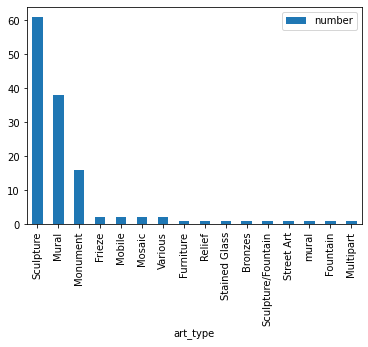

In [29]:
type_counts.plot(kind = 'bar', 
                 x = 'art_type', 
                 y = 'number');

If you have a large number of categories or long category names, it sometimes makes sense to do a horizontal bar chart.

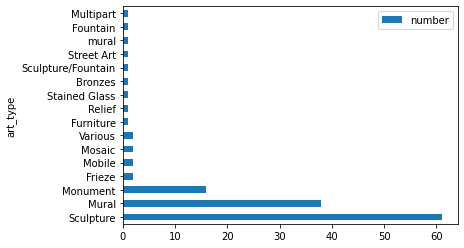

In [30]:
type_counts.plot(kind = 'barh', 
                 x = 'art_type', 
                 y = 'number');

If we want to plot the data with the largest values on top, we can use the `sort_values` method to sort our DataFrame before plotting.

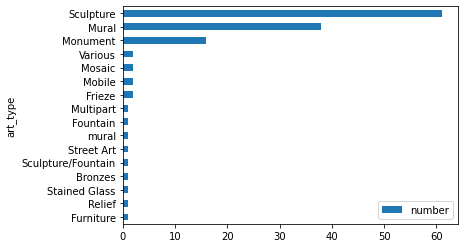

In [32]:
type_counts.sort_values('number').plot(kind = 'barh', 
                 x = 'art_type', 
                 y = 'number');

### Fancier horizontal barplot with seaborn

We can make a nicer looking plot using the _seaborn_ library. You can check out the seaborn plot gallery here: [https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html).


If you're not sure what each line is doing in the following block, try removing a line by adding a # at the beginning of that line to comment it out. This will make Python ignore the line when evaluating the block.

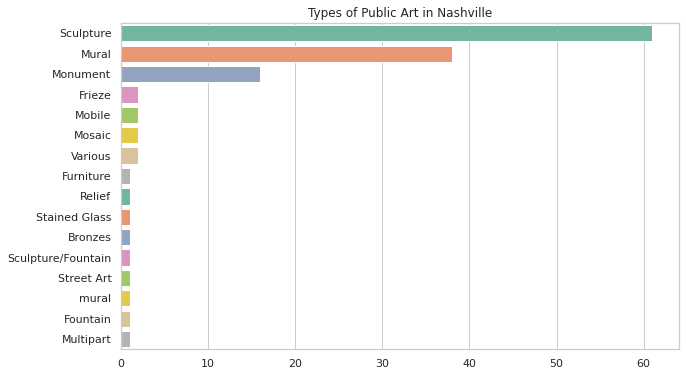

In [33]:
plt.figure(figsize = (10, 6))                               # Increase the plot size to 10 x 6
sns.set(style="whitegrid")                                  # Change the plot style
sns.barplot(x = 'number', 
            y = 'art_type', 
            data = type_counts, 
            palette = 'Set2')
plt.xlabel('')                                              # Remove the x-axis label
plt.ylabel('')                                              # Remove the y-axis label
plt.title('Types of Public Art in Nashville');